## **Schapen detecteren**

**Downloaden van de libraries**

In [1]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

**Inladen van data**

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def toon_afbeeldingen_van_dataset(map_pad, dataset_naam, aantal=1):
    bestandsnamen = os.listdir(map_pad)
    aantal_afbeeldingen = len(bestandsnamen)  # Aantal afbeeldingen in de map

    print(f"Aantal afbeeldingen in {dataset_naam} map: {aantal_afbeeldingen}")

    for i in range(min(aantal, aantal_afbeeldingen)):
        afbeelding_pad = os.path.join(map_pad, bestandsnamen[i])
        afbeelding = Image.open(afbeelding_pad)
        afbeelding_shape = afbeelding.size  

        plt.imshow(afbeelding)
        plt.title(f'Plaatje {i+1}: {dataset_naam} - Shape: {afbeelding_shape}')
        plt.show()



##### Tommi Path

In [ ]:
# Train map
train_map_pad = r'D:\HHS\Datalab IV\Data schapen tellen\train'
toon_afbeeldingen_van_dataset(train_map_pad, 'Train')

# Test map
test_map_pad = r'D:\HHS\Datalab IV\Data schapen tellen\test'
toon_afbeeldingen_van_dataset(test_map_pad, 'Test')

# Valid map
valid_map_pad = r'D:\HHS\Datalab IV\Data schapen tellen\valid'
toon_afbeeldingen_van_dataset(valid_map_pad, 'Valid')

##### Nima Path

Aantal afbeeldingen in Train map: 3610


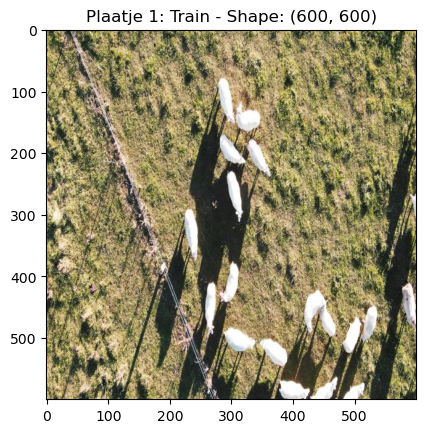

Aantal afbeeldingen in Test map: 175


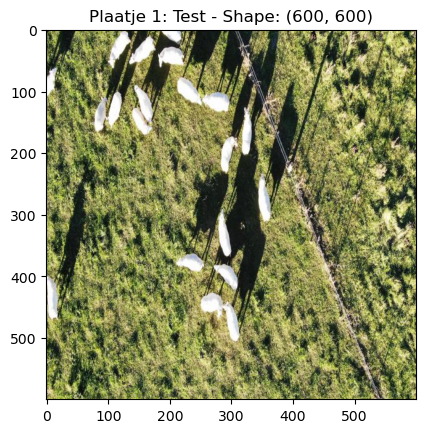

Aantal afbeeldingen in Valid map: 351


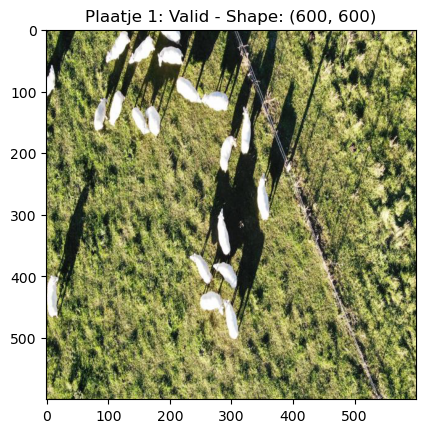

In [3]:
# Train map
train_map_pad = r'C:\Users\nimaa\Desktop\School\DataLab 4\schaap_datatset\train'
toon_afbeeldingen_van_dataset(train_map_pad, 'Train')

# Test map
test_map_pad = r'C:\Users\nimaa\Desktop\School\DataLab 4\schaap_datatset\test'
toon_afbeeldingen_van_dataset(test_map_pad, 'Test')

# Valid map
valid_map_pad = r'C:\Users\nimaa\Desktop\School\DataLab 4\schaap_datatset\valid'
toon_afbeeldingen_van_dataset(valid_map_pad, 'Valid')

##### Tommi annotaties

In [4]:
train_annotaties_path = r'D:\HHS\Datalab IV\Data schapen tellen\train\_annotations.csv'
train_annotaties_df = pd.read_csv(train_annotaties_path)

merge_df = train_annotaties_df.groupby('filename').size().reset_index(name='aantal_schapen')
merge_df.head(5)



FileNotFoundError: [Errno 2] No such file or directory: 'D:\\HHS\\Datalab IV\\Data schapen tellen\\train\\_annotations.csv'

##### Nima annotaties

In [5]:
train_annotaties_path = r'C:\Users\nimaa\Desktop\School\DataLab 4\schaap_datatset\train\_annotations.csv'
train_annotaties_df = pd.read_csv(train_annotaties_path)

merge_df = train_annotaties_df.groupby('filename').size().reset_index(name='aantal_schapen')
merge_df.head(5)

,filename,aantal_schapen
0,DJI_0004_0254_jpg.rf.0333171523950809f232bef7d...,19
1,DJI_0004_0254_jpg.rf.513d3cfa85ecfd7fac2f4bc2f...,17
2,DJI_0004_0254_jpg.rf.e5144c31935a35755134e5dfb...,20
3,DJI_0004_0255_jpg.rf.0cd3e42a2edd84243f435ecec...,19
4,DJI_0004_0255_jpg.rf.1e51f56a40b71cd3dd740f118...,22


In [6]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Functie om afbeeldingen te laden op basis van bestandspaden
def load_images_from_file_paths(file_paths):
    images = []
    for file_path in file_paths:
        try:
            image = Image.open(file_path)
            images.append(image)
        except Exception as e:
            print(f"Fout bij het openen van afbeelding {file_path}: {e}")
    return images


c:\Users\nimaa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Tommi Path

In [7]:
# Vervang dit pad door het pad naar jouw trainingsafbeeldingenmap
train_image_folder_path = 'D:\\HHS\\Datalab IV\\Data schapen tellen\\train'

# Vervang dit pad door het pad naar jouw testafbeeldingenmap
test_image_folder_path = 'D:\\HHS\\Datalab IV\\Data schapen tellen\\test'

# Vervang dit pad door het pad naar jouw validatieafbeeldingenmap
valid_image_folder_path = 'D:\\HHS\\Datalab IV\\Data schapen tellen\\valid'

# Lees de train annotaties
train_annotaties_path = r'D:\\HHS\\Datalab IV\\Data schapen tellen\\train\\_annotations.csv'
train_annotaties_df = pd.read_csv(train_annotaties_path)



FileNotFoundError: [Errno 2] No such file or directory: 'D:\\\\HHS\\\\Datalab IV\\\\Data schapen tellen\\\\train\\\\_annotations.csv'

##### Nima Path

In [ ]:
# Vervang dit pad door het pad naar jouw trainingsafbeeldingenmap
train_image_folder_path = r'C:\Users\nimaa\Desktop\School\DataLab 4\schaap_datatset\train'

# Vervang dit pad door het pad naar jouw testafbeeldingenmap
test_image_folder_path = r'C:\Users\nimaa\Desktop\School\DataLab 4\schaap_datatset\test'

# Vervang dit pad door het pad naar jouw validatieafbeeldingenmap
valid_image_folder_path = r'C:\Users\nimaa\Desktop\School\DataLab 4\schaap_datatset\valid'

# Lees de train annotaties
train_annotaties_path = r'C:\Users\nimaa\Desktop\School\DataLab 4\schaap_datatset\train\_annotations.csv'
train_annotaties_df = pd.read_csv(train_annotaties_path)

#### DataFrames maken

In [8]:
# Groepeer op bestandsnaam en tel het aantal schapen
aantal_schapen_per_afbeelding = train_annotaties_df.groupby('filename').size().reset_index(name='aantal_schapen')

# Split de dataset in train, test en valid
train_files, test_valid_files = train_test_split(aantal_schapen_per_afbeelding['filename'], test_size=0.2, random_state=42)
test_files, valid_files = train_test_split(test_valid_files, test_size=0.5, random_state=42)

# Maak dataframes voor de train, test en valid sets
train_df = aantal_schapen_per_afbeelding[aantal_schapen_per_afbeelding['filename'].isin(train_files)]
test_df = pd.DataFrame({'filename': test_files})
valid_df = pd.DataFrame({'filename': valid_files})

train_folder_files = [os.path.join(train_image_folder_path, filename) for filename in os.listdir(train_image_folder_path) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]
test_folder_files = [os.path.join(test_image_folder_path, filename) for filename in os.listdir(test_image_folder_path) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]
valid_folder_files = [os.path.join(valid_image_folder_path, filename) for filename in os.listdir(valid_image_folder_path) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Maak dataframes met de werkelijke bestandsnamen
train_df = pd.DataFrame({'filename': train_folder_files})
test_df = pd.DataFrame({'filename': test_folder_files})
valid_df = pd.DataFrame({'filename': valid_folder_files})

# Laad trainings-, test- en validatieafbeeldingen
train_images = load_images_from_file_paths(train_df['filename'].values)
test_images = load_images_from_file_paths(test_df['filename'].values)
valid_images = load_images_from_file_paths(valid_df['filename'].values)

# Sluit de geopende afbeeldingen om te voorkomen dat er te veel bestanden open blijven
for image in train_images + test_images + valid_images:
    image.close()

# Print de lengtes van de sets
print("Train set lengte:", len(train_df))
print("Test set lengte:", len(test_df))
print("Valid set lengte:", len(valid_df))



FileNotFoundError: [WinError 3] Het systeem kan het opgegeven pad niet vinden: 'D:\\HHS\\Datalab IV\\Data schapen tellen\\train'

**Data preprocessing**

In [9]:
train_df

,filename,aantal_schapen
1,DJI_0004_0254_jpg.rf.513d3cfa85ecfd7fac2f4bc2f...,17
2,DJI_0004_0254_jpg.rf.e5144c31935a35755134e5dfb...,20
3,DJI_0004_0255_jpg.rf.0cd3e42a2edd84243f435ecec...,19
4,DJI_0004_0255_jpg.rf.1e51f56a40b71cd3dd740f118...,22
5,DJI_0004_0255_jpg.rf.44bb4fd2feefd76a9b041e2c2...,22
...,...,...
3597,img_557_jpg.rf.8e78b71656417797ba270e7321290dc...,14
3598,img_557_jpg.rf.cd009ec3fa5991495ca65cdccdc8bd8...,14
3599,img_559_jpg.rf.446d82b2a4307c37fa7eb6cab81c4e1...,14
3600,img_559_jpg.rf.5d23d943e0033d7fbd81bd9a91fac97...,15


In [10]:
train_df['filename'] = train_df['filename'].apply(lambda x: os.path.basename(x))
test_df['filename'] = test_df['filename'].apply(lambda x: os.path.basename(x))
valid_df['filename'] = valid_df['filename'].apply(lambda x: os.path.basename(x))


C:\Users\nimaa\AppData\Local\Temp\ipykernel_4736\4294916737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['filename'] = train_df['filename'].apply(lambda x: os.path.basename(x))


In [11]:
merge_df['filename'] = merge_df['filename'].apply(lambda x: os.path.normpath(x))
train_df['filename'] = train_df['filename'].apply(lambda x: os.path.normpath(x))

# Merge de dataframes op 'filename'
train_df = pd.merge(train_df, merge_df, on='filename', how='left')

# Toon het resultaat
train_df

C:\Users\nimaa\AppData\Local\Temp\ipykernel_4736\1665373702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['filename'] = train_df['filename'].apply(lambda x: os.path.normpath(x))


,filename,aantal_schapen_x,aantal_schapen_y
0,DJI_0004_0254_jpg.rf.513d3cfa85ecfd7fac2f4bc2f...,17,17
1,DJI_0004_0254_jpg.rf.e5144c31935a35755134e5dfb...,20,20
2,DJI_0004_0255_jpg.rf.0cd3e42a2edd84243f435ecec...,19,19
3,DJI_0004_0255_jpg.rf.1e51f56a40b71cd3dd740f118...,22,22
4,DJI_0004_0255_jpg.rf.44bb4fd2feefd76a9b041e2c2...,22,22
...,...,...,...
2876,img_557_jpg.rf.8e78b71656417797ba270e7321290dc...,14,14
2877,img_557_jpg.rf.cd009ec3fa5991495ca65cdccdc8bd8...,14,14
2878,img_559_jpg.rf.446d82b2a4307c37fa7eb6cab81c4e1...,14,14
2879,img_559_jpg.rf.5d23d943e0033d7fbd81bd9a91fac97...,15,15


In [12]:
display(train_df.head(5))
display(test_df.head(5))
display(valid_df.head(5))

,filename,aantal_schapen_x,aantal_schapen_y
0,DJI_0004_0254_jpg.rf.513d3cfa85ecfd7fac2f4bc2f...,17,17
1,DJI_0004_0254_jpg.rf.e5144c31935a35755134e5dfb...,20,20
2,DJI_0004_0255_jpg.rf.0cd3e42a2edd84243f435ecec...,19,19
3,DJI_0004_0255_jpg.rf.1e51f56a40b71cd3dd740f118...,22,22
4,DJI_0004_0255_jpg.rf.44bb4fd2feefd76a9b041e2c2...,22,22


,filename
1233,DJI_0040_MOV-209_jpg.rf.1c80cb6385ca04abc7f04c...
295,DJI_0005_0168_jpg.rf.9f6c7f8d00ae880888b705727...
1171,DJI_0040_MOV-183_jpg.rf.d98c1f53e4409bc3a64f4d...
3542,img_511_jpg.rf.94571f8588cd88fad604aa9b4b24f43...
1011,DJI_0040_MOV-113_jpg.rf.77c19ee0aa97b21b3e81bc...


,filename
2063,DJI_0043_MOV-92_jpg.rf.5475b95c2a037a70a95df12...
2762,img_2240_jpg.rf.0edde1c03260ca1aa8ab620b76b169...
1577,DJI_0043_MOV-106_jpg.rf.e7ad412010d421bfd3db08...
712,DJI_0039_MOV-187_jpg.rf.25bb9c3c826aba7608b302...
351,DJI_0005_0195_jpg.rf.08295946bf41a1029f3b83bd8...


## EDA Afbeeldingen

In [13]:
min_aantal_schapen = train_df['aantal_schapen'].min()
max_aantal_schapen = train_df['aantal_schapen'].max()

plt.hist(train_df['aantal_schapen'], bins=range(int(min_aantal_schapen), int(max_aantal_schapen)+1))
plt.title('Histogram van aantal schapen per afbeelding')
plt.xlabel('Aantal schapen')
plt.ylabel('Aantal afbeeldingen')
plt.show()


print(train_df["aantal_schapen"].describe())

#modus
print("Modus:", train_df["aantal_schapen"].mode())

KeyError: 'aantal_schapen'

## Model

In [ ]:
## Model

from tensorflow import keras
from tensorflow.keras import layers

schapen_teller_model = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(600, 600, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='linear')
])

Het gebruik van de lineaire activatiefunctie in de laatste  neuron is geschikt voor regressieproblemen, waarbij we een continue uitvoer willen voorspellen in plaats van een classificatie. In het geval van het tellen van schapen op afbeeldingen, willen we een getal voorspellen dat het aantal schapen op de afbeelding vertegenwoordigt, wat een continue variabele is.

In [14]:
## Maken van x_train en y_train


)




c:\Users\nimaa\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 2881 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


KeyError: 'aantal_schapen'

In [ ]:
x_train

array([], dtype=float64)

In [ ]:
# Naar numpy arrays

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
# Compileer het model

schapen_teller_model.compile(optimizer='adam', loss='mean_squared_error')

**Mean Squared Error:**
 
 MSE kwadrateert het verschil tussen de voorspelde waarden en de werkelijke waarden en neemt het gemiddelde over alle voorbeelden. Door het kwadrateren van het verschil worden grote fouten zwaarder gewogen dan kleine fouten, wat nuttig is omdat we willen dat ons model zich meer bewust is van grotere afwijkingen. Voor het tellen van schapen willen we de afwijking tussen het voorspelde aantal schapen en het werkelijke aantal schapen minimaliseren, dus MSE is een wordt daarom onze keus.

**Adam Optimizer:**

De reden voor Adam is omdat Adam een zeer populaire techniek en aansluit bij ons regressieprobleem


In [ ]:

# Train the model
schapen_teller_model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\nimaa\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\nimaa\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\nimaa\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\nimaa\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\nimaa\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\nimaa\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=True
      • mask=None
